In [1272]:
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('agg')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [1273]:
df2 = pd.read_csv("C:/Users/Aarnav.Sawant23/Code/COVID-19/data/us-counties.csv", parse_dates=['date'], index_col = ['date'])
filter = df2["state"] == "California"
df = df2.loc[filter]
print(df.shape[0])
sorted_df = df.sort_values(['county', 'date'])
sorted_df.head()

1302


,county,state,fips,cases,deaths
date,,,,,
2020-03-01,Alameda,California,6001.0,1,0
2020-03-02,Alameda,California,6001.0,1,0
2020-03-03,Alameda,California,6001.0,2,0
2020-03-04,Alameda,California,6001.0,2,0
2020-03-05,Alameda,California,6001.0,2,0


In [1274]:
X_test = np.array(range(0, 60))

In [1275]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [1276]:
# np.set_printoptions(suppress=True)
# print("Predicted Case Number After One Week: ", lin_reg.predict(poly_reg.fit_transform(np.array([[70]])))[0])

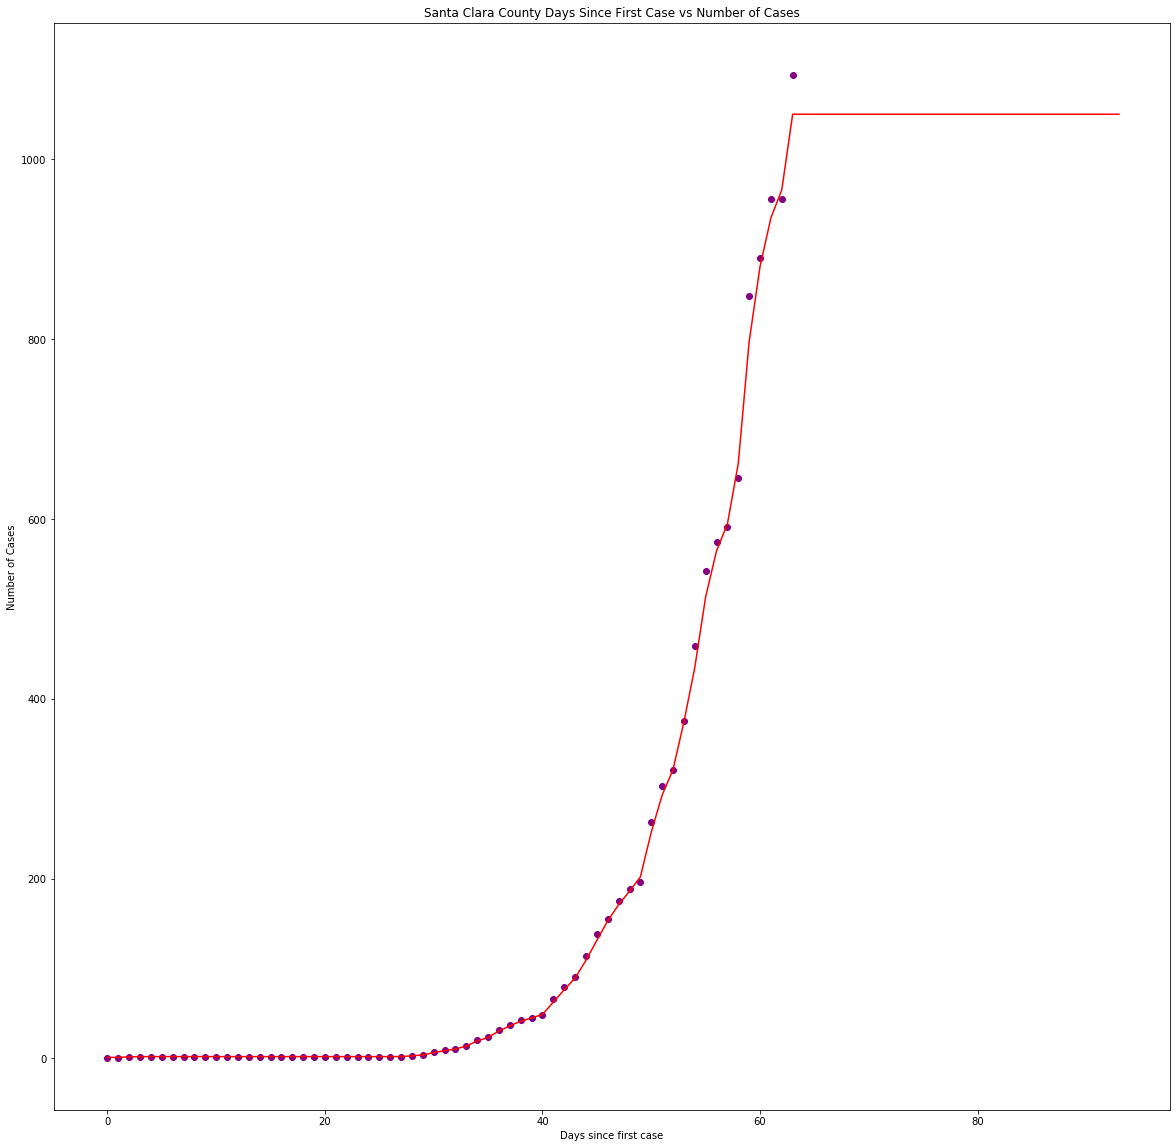

In [1277]:
counties = sorted_df['county'].unique()
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(x-x0)))+b
    return (y)
def percentageChange(firstValue, currentValue):
    return (currentValue - firstValue)/mat.abs(firstValue)

def getCountyForecastRF(county):
    fig, ax = plt.subplots(figsize=(20, 20)) 
    filter = df["county"] == county
    df3 = df.loc[filter]
    x = np.array(range(0, df3.shape[0])).reshape(-1, 1)
    y = df3.iloc[:, 3]
    from sklearn.ensemble import RandomForestRegressor
    regressor = RandomForestRegressor(n_estimators=200, random_state=0)
    regressor.fit(x, y)
    pred_x = np.array(range(0, df3.shape[0] + 30)).reshape(-1, 1)
    pred_y = (regressor.predict(pred_x)).reshape(-1, 1)
    ax.plot(pred_x, pred_y, color = "red")
    ax.set_title("%s County Days Since First Case vs Number of Cases" % county)
    plt.xlabel("Days since first case")
    plt.ylabel("Number of Cases")
    np.set_printoptions(suppress=True)
    ax.scatter(x, y, color='purple')
#     plt.savefig("C:/Users/Aarnav.Sawant23/Code/COVID-19/plots/%s.jpg" % (county + "-2020"), dpi=150)
    


def getCountyForecastSigmoid(county):
    fig, ax = plt.subplots(figsize=(20, 20)) 
    filter = df["county"] == county
    df3 = df.loc[filter]
    x = np.array(range(0, df3.shape[0]))
    y = df3.iloc[:, 3]
    p0 = [max(y), np.median(x),1,min(y)]
    popt, pcov = curve_fit(sigmoid, x, y, p0, method='trf', maxfev=6000)
    pred_y = sigmoid(np.array(range(0, 60)), *popt)
    pred_x = np.array(range(0, df3.shape[0] + 30)).reshape(-1, 1)
    pred_y = sigmoid(pred_x, *popt)
    ax.plot(pred_x, pred_y, color = "red")
    ax.set_title("%s County Days Since First Case vs Number of Cases" % county)
    plt.xlabel("Days since first case")
    plt.ylabel("Number of Cases")
    np.set_printoptions(suppress=True)
    ax.scatter(x, y, color='purple')
    plt.savefig("C:/Users/Aarnav.Sawant23/Code/COVID-19/plots/%s.jpg" % (county + "-2020"), dpi=150)
    fig.clear()
    plt.close()
for county in counties
    getCountyForecastSigmoid(county)